# Imports

In [34]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
import random
import scipy.optimize as opt
from scipy import stats

random.seed(19680801)
np.random.seed(19680801)

# Task #2 "Algorithms for unconstrained nonlinear optimization. Direct methods”

# Goal

### The use of direct methods (one-dimensional methods of exhaustive search, dichotomy, golden section search; multidimensional methods of exhaustive search, Gauss (coordinate descent), Nelder-Mead) in the tasks of unconstrained nonlinear optimization.

# Problem

### I.	Use the one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate (with precision x: f(x) -> min for the following functions and domains:
###     f(x) = x3, x ∈ [0,1];
###     f(x) = |x – 0.2|, x ∈ [0,1];
###     f(x) = x sin 1/x, x ∈ [0.01,1].

### Calculate the number of f-calculations and the number of iterations performed in each method and analyze the results. Explain differences (if any) in the results obtained.

# Function & Methods

In [4]:
# functions
f1 = lambda x: x**3
a1 = 0
b1 = 1

f2 = lambda x: abs(x - 0.2)
a2 = 0
b2 = 1

f3 = lambda x: x * np.sin(1/x)
a3 = 0.01
b3 = 1

In [11]:
# methods
def exhaustive_search(func, a, b, e = 0.001):
    n = int((b - a) / e)
    optim_point = [a, func(a)]

    for k in range(0, n):
        x_k = a + k * ((b - a) / n)
        y_k = func(x_k)

        if optim_point[1] > y_k:
            optim_point = [x_k, y_k]

    iter_count = n
    func_count = n

    return optim_point, iter_count, func_count

In [12]:
def dichotomy(func, a, b, e = 0.001):
    sigma = random.uniform(0, e)
    iter_count, func_count = 0, 0

    x1 = (a + b - sigma)/2
    x2 = (a + b + sigma)/2

    while abs(a - b) > e:
        if func(x1) <= func(x2):
            b = x2
        else:
            a = x1

        x1 = (a + b - sigma)/2
        x2 = (a + b + sigma)/2

        iter_count += 1
        func_count += 2

    optim_point = [(a + b) / 2, (func(x1) + func(x2))  / 2]
    return optim_point, iter_count, func_count

In [13]:
def golden_section(func, a, b, e = 0.001):
    iter_count, func_count = 0, 2

    x1 = a + ((3 - math.sqrt(5))/2)*(b - a)
    x2 = b + ((math.sqrt(5) - 3)/2)*(b - a)

    f_1 = func(x1)
    f_2 = func(x2)

    while abs(a - b) > e:
        if func(x1) <= func(x2):
            b = x2
            x2 = x1
            f_2 = f_1

            x1 = a + ((3 - math.sqrt(5))/2)*(b - a)
            f_1 = func(x1)
        else:
            a = x1
            x1 = x2
            f_1 = f_2

            x2 = b + ((math.sqrt(5) - 3)/2)*(b - a)
            f_2 = func(x2)

        iter_count += 1
        func_count += 1

    optim_point = [(a + b) / 2, (func(x1) + func(x2))  / 2]

    return optim_point, iter_count, func_count

# Part 1

## Function f(x) = x^3

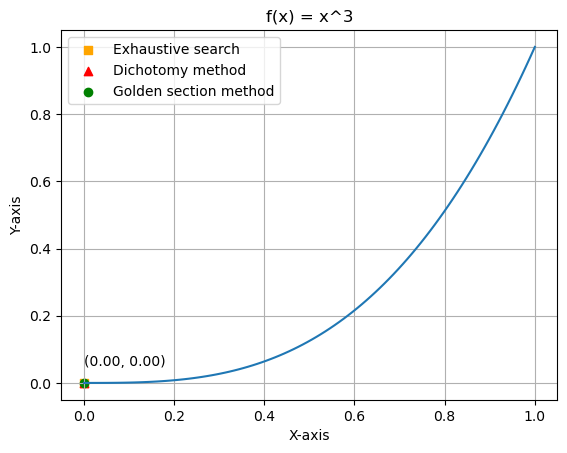

In [82]:
# Visualization
point_exh, iter_exh, f_exh = exhaustive_search(f1, a1, b1)
point_dih, iter_dih, f_dih = dichotomy(f1, a1, b1)
point_golden, iter_golden, f_golden = golden_section(f1, a1, b1)

f1_df = pd.DataFrame({'Number of iterations': [iter_exh, iter_dih, iter_golden ],
                      'Number of f-calculations':[f_exh, f_dih, f_golden]},
                      index=['Exhaustive search', 'Dichotomy method', 'Golden section method'])
x = np.linspace(a1, b1, 100)

plt.figsize = (7, 10)
plt.plot(x, f1(x))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('f(x) = x^3')
plt.scatter(point_exh[0], point_exh[1], c='orange', marker='s', label = 'Exhaustive search')
plt.scatter(point_dih[0], point_dih[1], c='red', marker='^', label = 'Dichotomy method')
plt.scatter(point_golden[0], point_golden[1], c='green', marker = 'o', label = 'Golden section method')
plt.text(point_exh[0], point_exh[1] + 0.05, '({0:0.2f}, {1:0.2f})'.format(point_exh[0], point_exh[1]))
plt.legend()
plt.grid()

In [83]:
f1_df

,Number of iterations,Number of f-calculations
Exhaustive search,1000,1000
Dichotomy method,15,30
Golden section method,15,17


## Function f(x) = |x - 0.2|

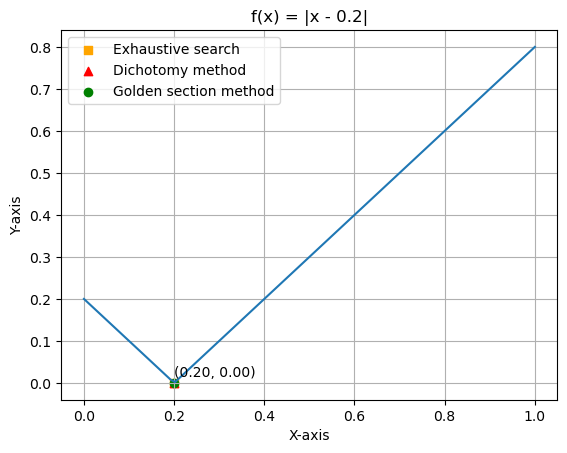

In [84]:
# Visualization
point_exh, iter_exh, f_exh = exhaustive_search(f2, a2, b2)
point_dih, iter_dih, f_dih = dichotomy(f2, a2, b2)
point_golden, iter_golden, f_golden = golden_section(f2, a2, b2)

f2_df = pd.DataFrame({'Number of iterations': [iter_exh, iter_dih, iter_golden ],
                      'Number of f-calculations':[f_exh, f_dih, f_golden]},
                      index=['Exhaustive search', 'Dichotomy method', 'Golden section method'])
x = np.linspace(a2, b2, 100)

plt.figsize = (7, 10)
plt.plot(x, f2(x))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('f(x) = |x - 0.2|')
plt.scatter(point_exh[0], point_exh[1], c='orange', marker='s', label = 'Exhaustive search')
plt.scatter(point_dih[0], point_dih[1], c='red', marker='^', label = 'Dichotomy method')
plt.scatter(point_golden[0], point_golden[1], c='green', marker = 'o', label = 'Golden section method')
plt.text(point_exh[0], point_exh[1] + 0.015, '({0:0.2f}, {1:0.2f})'.format(point_exh[0], point_exh[1]))
plt.legend()
plt.grid()

In [85]:
f2_df

,Number of iterations,Number of f-calculations
Exhaustive search,1000,1000
Dichotomy method,11,22
Golden section method,15,17


## Function f(x) = x sin(1/x)

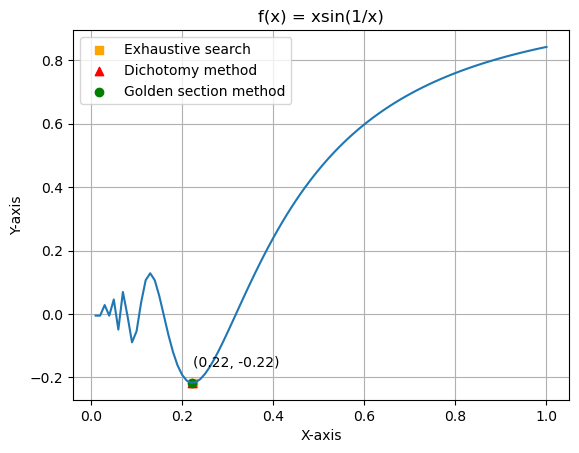

In [86]:
# Visualization
point_exh, iter_exh, f_exh = exhaustive_search(f3, a3, b3)
point_dih, iter_dih, f_dih = dichotomy(f3, a3, b3)
point_golden, iter_golden, f_golden = golden_section(f3, a3, b3)

f3_df = pd.DataFrame({'Number of iterations': [iter_exh, iter_dih, iter_golden ],
                      'Number of f-calculations':[f_exh, f_dih, f_golden]},
                      index=['Exhaustive search', 'Dichotomy method', 'Golden section method'])
x = np.linspace(a3, b3, 100)

plt.figsize = (7, 10)
plt.plot(x, f3(x))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('f(x) = xsin(1/x)')
plt.scatter(point_exh[0], point_exh[1], c='orange', marker='s', label = 'Exhaustive search')
plt.scatter(point_dih[0], point_dih[1], c='red', marker='^', label = 'Dichotomy method')
plt.scatter(point_golden[0], point_golden[1], c='green', marker = 'o', label = 'Golden section method')
plt.text(point_exh[0], point_exh[1] + 0.05, '({0:0.2f}, {1:0.2f})'.format(point_exh[0], point_exh[1]))
plt.legend()
plt.grid()

In [87]:
f3_df

,Number of iterations,Number of f-calculations
Exhaustive search,990,990
Dichotomy method,11,22
Golden section method,15,17


# Part 2

In [111]:
a = random.random()
b = random.random()

print(a, b)

0.8685330622449837 0.7762188443644913


In [112]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

In [113]:
x = np.linspace(0, 101, 101) / 100
sigma = np.random.normal(0, 0.1, 101)

y = a * x + b + sigma

## Deviation is too large
## The data is almost random and the correlation is close to 0 with variance = 1, so it was decided to reduce the variance to 0.1

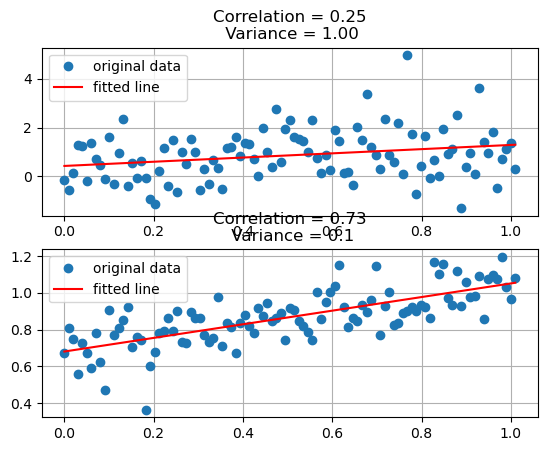

In [91]:
x_normal = np.linspace(0, 101, 101) / 100
sigma_normal = np.random.normal(0, 1, 101)

y_normal = a * x_normal + b + sigma_normal


fig, ax = plt.subplots(2)

res = stats.linregress(x_normal, y_normal)
r, p = stats.pearsonr(x_normal, y_normal)

ax[0].plot(x_normal, y_normal, 'o', label='original data')
ax[0].plot(x_normal, res.intercept + res.slope*x_normal, 'r', label='fitted line')
ax[0].title.set_text('Correlation = ' + "{:.2f}".format(r)
                        + '\n Variance = ' + "{:.2f}".format(1) )
ax[0].grid(True)
ax[0].legend()

res = stats.linregress(x, y)
r, p = stats.pearsonr(x, y)

ax[1].plot(x, y, 'o', label='original data')
ax[1].plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
ax[1].title.set_text('Correlation = ' + "{:.2f}".format(r)
                        + '\n Variance = ' + "{:.1f}".format(0.1) )

ax[1].grid(True)
ax[1].legend()

plt.show()

Text(0.5, 0.5, 'Bias')

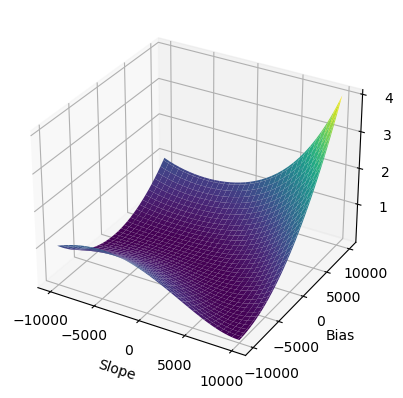

In [92]:
slope = np.linspace(-10000,10000,num=101)
bias = np.linspace(-10000, 10000,num=101)
w0, w1 = np.meshgrid(slope, bias)
ypred = w0*x + w1
loss = np.power((y-ypred),2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(w0,
                    w1,
                    loss,
                    label="Loss surface",
                    cmap='viridis', edgecolor='none')

ax.set_xlabel('Slope')
ax.set_ylabel('Bias')

## More functions for graphs

In [93]:
colors = ['b','g','r','c','m','y','k']

def plot_aprox_result(x, y, methods_and_coafs, aprox_func, aprox_method_name):
    num_of_plots = len(methods_and_coafs) + 1
    fig, ax = plt.subplots(num_of_plots, figsize=(6, 10))

    fig.suptitle(aprox_method_name)

    for idx, (method) in enumerate(methods_and_coafs) :
        ax[idx].scatter(x, y)
        coef = methods_and_coafs[method]

        color = colors[idx]
        ax[idx].plot(x, aprox_func(x, coef[0], coef[1] ), label=method, color=color)
        ax[idx].set(xlabel='x', ylabel='y')

        ax[idx].legend()
        ax[idx].grid()

    num_of_plots -= 1
    ax[num_of_plots].scatter(x, y)
    ax[num_of_plots].set(xlabel='x', ylabel='y')

    for idx, (method) in enumerate(methods_and_coafs):

        coef = methods_and_coafs[method]
        print(coef)

        color = colors[idx]
        ax[num_of_plots].plot(x, aprox_func(x, coef[0], coef[1] ), label=method, color=color)

        ax[num_of_plots].legend()
        ax[num_of_plots].grid()

    plt.show()

In [94]:
def make_table_2d(table_data,
               row_headers = ['exhaustive_search_2d','Gauss','Nelder-Mead'],
               column_headers = ['iter_count','f_calc_count', 'precision']):

    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table_data,
        rowLabels=row_headers,
        colLabels=column_headers,
        loc='center',
        cellLoc='center')

    plt.show()

## Defining loss functions for regression

In [95]:
def linear(x, a, b):
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)

#Spesial version for loss to use in scipy optimisation
def loss_linear(z, *params):
    x, y = params
    a, b = z
    return np.sum((linear(x, a, b) - y)**2)

#Functional version for loss to calc precision
def f_loss_linear(x, y, a, b):
    return np.sum((linear(x, a, b) - y)**2)

#Spesial version for loss to use in scipy optimisation
def loss_rational(z, *params):
    x, y = params
    a, b = z
    return np.sum((rational(x, a, b) - y)**2)

#Functional version for loss to calc precision
def f_loss_rational(x, y, a, b):
    return np.sum((rational(x, a, b) - y)**2)

## Calculating regression coefs by different methods

## Brute force method linear

In [96]:
brute_force = opt.brute(loss_linear, ([0,1],[0,1]), args=(x,y),  Ns = 1000, full_output=True)

brute_force_coafs = brute_force[0]
grid_size_x, grid_size_y = len(brute_force[2][0]), len(brute_force[2][0])
brute_froce_iter_count =  grid_size_x * grid_size_y
brute_force_f_calc_count = brute_froce_iter_count
brute_force_precision = f_loss_linear(x, y, brute_force_coafs[0], brute_force_coafs[1])

brute_force_result = [brute_froce_iter_count, brute_force_f_calc_count, brute_force_precision]

brute_force_result

[1000000, 1000000, 1.0374467924672754]

## Brute force method rational

In [97]:
brute_force_rational = opt.brute(loss_rational, ([0,1],[0,1]), args=(x,y),  Ns = 1000, full_output=True)

brute_force_coafs_rational = brute_force_rational[0]
grid_size_x, grid_size_y = len(brute_force_rational[2][0]), len(brute_force_rational[2][0])
brute_froce_iter_count_rational =  grid_size_x * grid_size_y
brute_force_f_calc_count_rational = brute_froce_iter_count_rational
brute_force_precision_rational = f_loss_rational(x, y, brute_force_coafs_rational[0], brute_force_coafs_rational[1])

brute_force_result_rational = [brute_froce_iter_count_rational,
                               brute_force_f_calc_count_rational,
                               brute_force_precision_rational]

brute_force_result_rational

[1000000, 1000000, 1.0470630289691378]

In [98]:
brute_force_coafs_rational

array([ 0.70729354, -0.34197853])

## Coordinate descent method

In [115]:
def get_loss_func(fix_coord, loss_type, coefs):
    if loss_type == 'rational':
        func = rational
    if loss_type == 'linear':
        func = linear

    if fix_coord == 'a':
        return lambda a: np.sum((func(x, a, coefs[1]) - y)**2)
    if fix_coord == 'b':
        return lambda b: np.sum((func(x, coefs[0], b) - y)**2)

def coordinate_descent(params, limits, loss_type, e=0.00001):
    dims = len(params)
    coefs = np.random.randn(dims) * 100
    min_loss_value = [float('inf'), float('inf')]
    iter_sum = 0
    func_calc_sum = 0

    while True:
        L = get_loss_func('a', loss_type, coefs)
        optim_point, iter_count, f_calc_count = exhaustive_search(L, *limits[0])
        coefs[0] = optim_point[0]

        iter_sum += iter_count
        func_calc_sum += f_calc_count

        L = get_loss_func('b', loss_type, coefs)
        optim_point, iter_count, f_calc_count = exhaustive_search(L, *limits[1])
        coefs[1] = optim_point[0]

        iter_sum += iter_count
        func_calc_sum += f_calc_count

        if abs(min_loss_value[0] - optim_point[0]) <= e and abs(min_loss_value[1] - optim_point[1]) <= e:
            break
        else:
            print(optim_point[0], optim_point[1])
            min_loss_value = optim_point

    return coefs, iter_sum, func_calc_sum

## Coordinate descent linear

In [116]:
coord_descent_coefs,\
coord_descent_iter_sum,\
coord_descent_func_calc_sum = coordinate_descent((x, y), ((-1,1),(-1,1)),loss_type='linear')
coord_descent_precision = f_loss_linear(x, y, coord_descent_coefs[0], coord_descent_coefs[1])

coordinate_descent_result = [coord_descent_iter_sum, coord_descent_func_calc_sum, coord_descent_precision]

0.9990000000000001 86.4659566862476
0.942 1.9487435991337918
0.899 1.5212914287744346
0.867 1.2785514036044097
0.843 1.1459925636138226
0.8260000000000001 1.0724164660173146
0.813 1.0329753821969236
0.8029999999999999 1.0093191219912914
0.796 0.9969295395933482
0.79 0.9896033760459005
0.786 0.9851869929477152
0.7830000000000001 0.9830308019800256
0.7810000000000001 0.9819437446748989
0.7790000000000001 0.9813007888237043
0.778 0.980838763727209
0.7770000000000001 0.980702276194578
0.776 0.9805081408820143
0.776 0.9804525131020825


## Coordinate descent rational

In [117]:
coord_descent_coefs_rational,\
coord_descent_iter_sum_rational,\
coord_descent_func_calc_sum_rational = coordinate_descent((x, y), ((-1,1),(-1,1)), loss_type='rational')
coord_descent_precision_rational = f_loss_rational(x, y, coord_descent_coefs[0], coord_descent_coefs[1])

coordinate_descent_result_rational = [coord_descent_iter_sum, coord_descent_func_calc_sum, coord_descent_precision]

-0.396 1.9091730926680954
-0.42399999999999993 1.6245959610507903
-0.44399999999999995 1.4676985453846985
-0.45699999999999996 1.3873090383592788
-0.46599999999999997 1.3463707639820282
-0.473 1.3240490266447575
-0.478 1.3115673738913103
-0.481 1.3053301355140279
-0.484 1.3016692499753078
-0.486 1.2990184220082253
-0.488 1.2977207647759454
-0.489 1.2972504046885083
-0.49 1.2968997687056938
-0.491 1.2966694218129273
-0.491 1.2964826921292454


In [118]:
coord_descent_coefs_rational

array([ 0.888, -0.491])

## Nelder-Mead linear

In [119]:
initial_guess = [0, 0]
nelder_mead = opt.minimize(loss_linear, initial_guess, args=(x,y), method='Nelder-Mead', tol = 0.001)

nelder_mead

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.980327514821211
             x: [ 8.948e-01  7.737e-01]
           nit: 59
          nfev: 115
 final_simplex: (array([[ 8.948e-01,  7.737e-01],
                       [ 8.942e-01,  7.740e-01],
                       [ 8.947e-01,  7.739e-01]]), array([ 9.803e-01,  9.803e-01,  9.803e-01]))

In [120]:
nelder_mead_result = [nelder_mead['nit'], nelder_mead['nfev'], nelder_mead['fun']]

## Nelder-Mead rational

In [121]:
initial_guess = [0, 0]
nelder_mead_rational = opt.minimize(loss_rational, initial_guess, args=(x,y), method='Nelder-Mead', tol = 0.001)

nelder_mead_rational

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.296430052962642
             x: [ 8.874e-01 -4.921e-01]
           nit: 58
          nfev: 108
 final_simplex: (array([[ 8.874e-01, -4.921e-01],
                       [ 8.864e-01, -4.926e-01],
                       [ 8.875e-01, -4.915e-01]]), array([ 1.296e+00,  1.296e+00,  1.296e+00]))

In [122]:
nelder_mead_result_rational = [nelder_mead_rational['nit'], nelder_mead_rational['nfev'], nelder_mead_rational['fun']]

## Visualising result of calculationg coefs

[0.37041895 0.68079671]
[0.891 0.776]
[0.89480215 0.77369413]


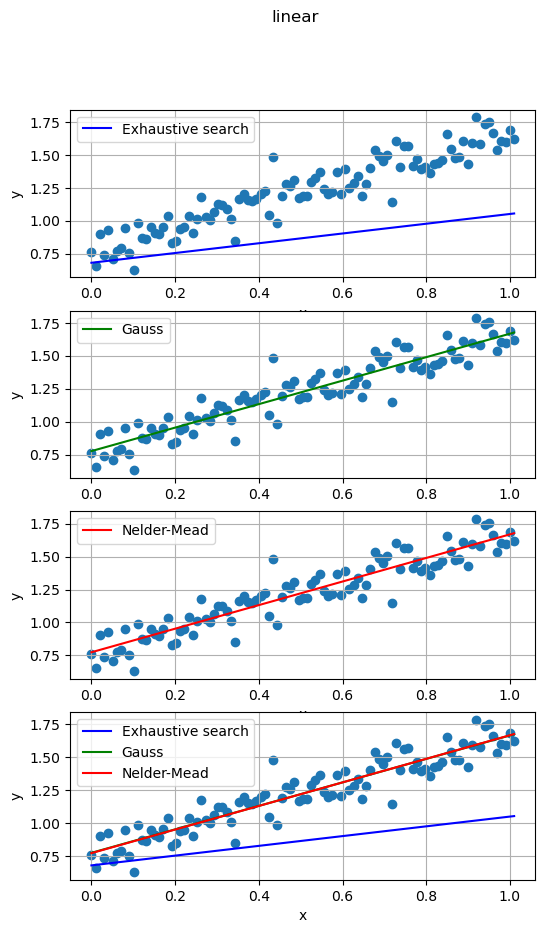

In [123]:
methods_and_coafs = {
    'Exhaustive search': brute_force_coafs,
    'Gauss': coord_descent_coefs,
    'Nelder-Mead': nelder_mead['x'],
}

plot_aprox_result(x, y, methods_and_coafs,linear, 'linear')

[ 0.70729354 -0.34197853]
[ 0.888 -0.491]
[ 0.88738663 -0.49207599]


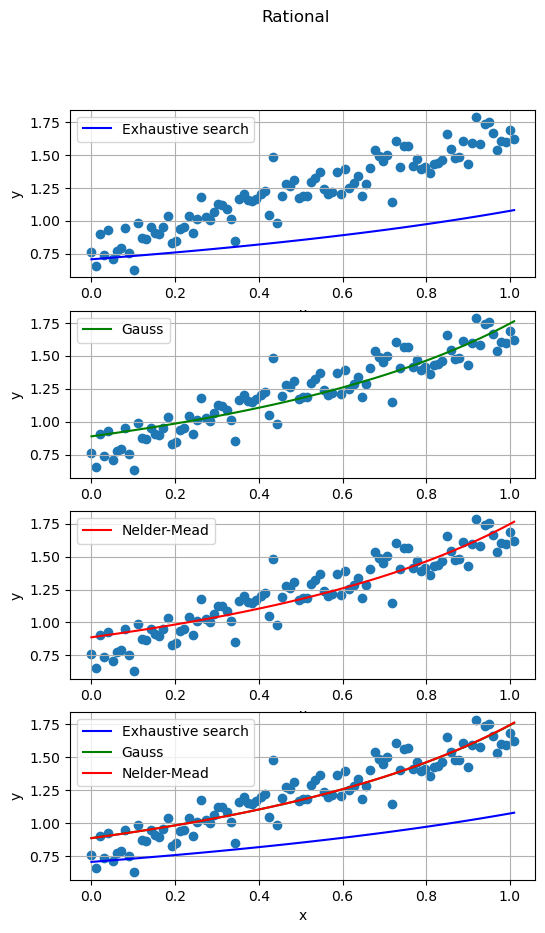

In [124]:
methods_and_coafs = {
    'Exhaustive search': brute_force_coafs_rational,
    'Gauss': coord_descent_coefs_rational,
    'Nelder-Mead': nelder_mead_rational['x'],
}

plot_aprox_result(x, y, methods_and_coafs,rational, 'Rational')

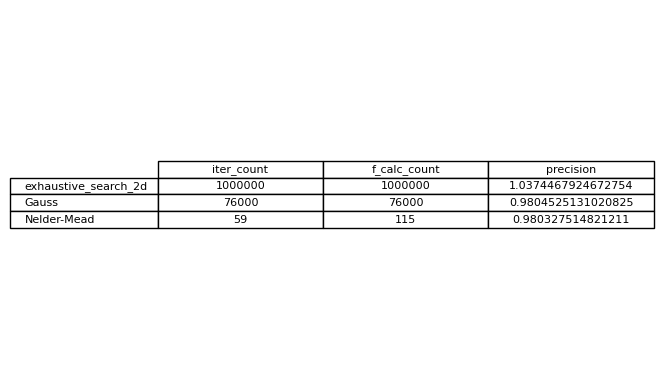

In [125]:
make_table_2d([brute_force_result,coordinate_descent_result,nelder_mead_result])

# Conclusion

### In this practical work was considered several direct methods of unconstrained nonlinear optimization. The obtained results show us how the exhaustive search slow, this method approximant is 83 times more iterations and make f-calculations 50 times more in compare of two other methods of optimization.